<img src="https://www.uss.cl/wp-content/themes/uss/img/logo.svg" width="400">

# Universidad San Sebastián - Magister Data Science

## Machine Learning 
### Métodos de Clasificación I
### Marco Cedeño

En este Notebook se va a realizar la aplicación de los algoritmos de selección de modelos de clasificación:

* Precisión, Sensibilidad, Especificidad

* Medida F1

* Curva ROC - AUC 

Cada algoritmo tiene una implementación simple en base a un conjunto de datos pequeño, para luego realizar la aplicación de cada algoritmo sobre un conjunto de datos más extenso.

## 1. Precisión, Sensibilidad, Especificidad y Medida F1

Parámetros que se obtienen a partir de la matriz de confusión y que nos ayudan a realizar la selección de un buen clasificador

## Ejercico de la última actividad en clases

╒═══════════════╤═════════════╤═════════════╤════════════════╤═════════════════╤═════════════╕
│ Algorithm     │   Exactitud │   Precisión │   Sensibilidad │   Especificidad │   Medida F1 │
╞═══════════════╪═════════════╪═════════════╪════════════════╪═════════════════╪═════════════╡
│ KNN           │    0.969444 │    0.970202 │       0.969444 │               1 │    0.969483 │
├───────────────┼─────────────┼─────────────┼────────────────┼─────────────────┼─────────────┤
│ Naive Bayes   │    0.777778 │    0.84412  │       0.777778 │               1 │    0.774418 │
├───────────────┼─────────────┼─────────────┼────────────────┼─────────────────┼─────────────┤
│ Decision Tree │    0.844444 │    0.850867 │       0.844444 │               1 │    0.844584 │
╘═══════════════╧═════════════╧═════════════╧════════════════╧═════════════════╧═════════════╛


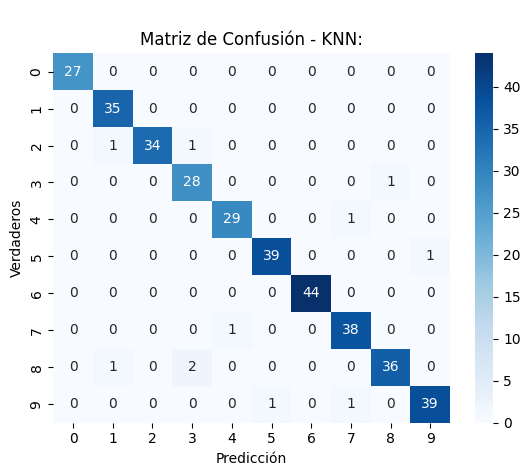

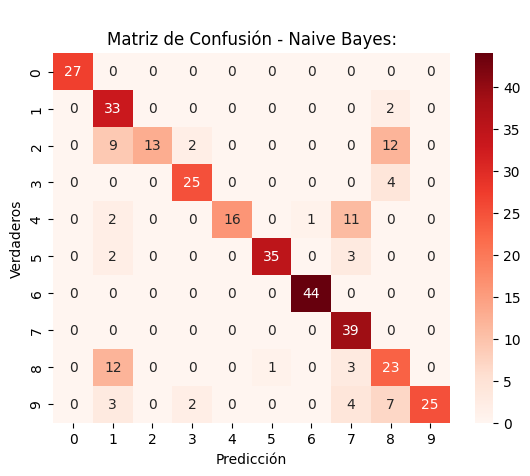

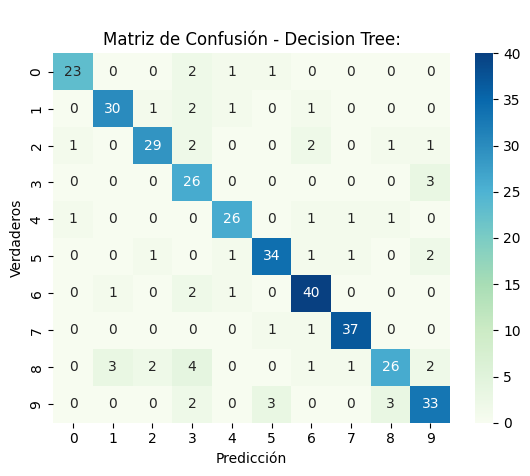

In [1]:
# Ejemplo de aplicación de índices de selección del modelo de clasificación

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de los datos
digits = datasets.load_digits()


# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

# Estandarizar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Datos de entrenamiento estandarizados
X_test = sc.transform(X_test)        # Datos de prueba estandarizados con los parámetros anteriores


# Clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
#knn_acc = round(accuracy_score(y_test, knn_pred) * 100, 2)

# Clasificador Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
#nb_acc = round(accuracy_score(y_test, nb_pred) * 100, 2)

# Clasificador Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
#dt_acc = round(accuracy_score(y_test, dt_pred) * 100, 2)


# Cálculo de métricas para cada clasificador


knn_acc = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred, average='weighted')
knn_rec = recall_score(y_test, knn_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_pred, average='weighted')
knn_spec = confusion_matrix(y_test, knn_pred)[0, 0] / (
            confusion_matrix(y_test, knn_pred)[0, 0] + confusion_matrix(y_test, knn_pred)[0, 1])

nb_acc = accuracy_score(y_test, nb_pred)
nb_prec = precision_score(y_test, nb_pred, average='weighted')
nb_rec = recall_score(y_test, nb_pred, average='weighted')
nb_f1 = f1_score(y_test, nb_pred, average='weighted')
nb_spec = confusion_matrix(y_test, nb_pred)[0, 0] / (confusion_matrix(y_test, nb_pred)[0, 0] + confusion_matrix(y_test, nb_pred)[0, 1])

dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred, average='weighted')
dt_rec = recall_score(y_test, dt_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')
dt_spec = confusion_matrix(y_test, dt_pred)[0, 0] / (confusion_matrix(y_test, dt_pred)[0, 0] + confusion_matrix(y_test, dt_pred)[0, 1])

# Resultados en una tabla
table = [
    ["KNN", knn_acc, knn_prec, knn_rec, knn_spec,knn_f1],
    ["Naive Bayes", nb_acc, nb_prec, nb_rec, nb_spec,nb_f1],
    ["Decision Tree", dt_acc, dt_prec, dt_rec, dt_spec,dt_f1]
]

headers = ["Algorithm", "Exactitud", "Precisión", "Sensibilidad", "Especificidad","Medida F1"]

# Impresión de la tabla
print(tabulate(table, headers, tablefmt="fancy_grid"))

# Matriz de confusión para cada clasificador


cm1 = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm1, annot=True, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.title("\nMatriz de Confusión - KNN:")
plt.show()




cm2 = confusion_matrix(y_test, nb_pred)
sns.heatmap(cm2, annot=True, cmap="Reds")
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.title("\nMatriz de Confusión - Naive Bayes:")
plt.show()



cm3 = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm3, annot=True, cmap="GnBu")
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.title("\nMatriz de Confusión - Decision Tree:")
plt.show()

## 2. Curva ROC y cálculo AUC

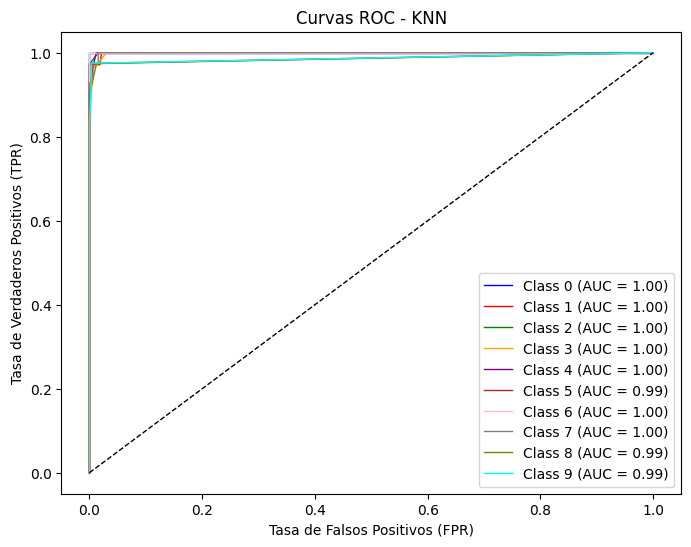

KNN AUC promedio: 0.9957959196801554
Naive Bayes AUC promedio: 0.9731724772717592
Decision Tree AUC promedio: 0.9142134089817937


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas de prueba
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calcular las probabilidades de predicción para cada clase
knn_probs = knn.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)

# Calcular la curva ROC y el AUC para cada clase


# Existen APIs de sklearn para realizarlo, pero en este caso no se pueden aplicar debido a que existen mcuhas clases
# knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs[:, 1], pos_label=1)
# knn_auc = roc_auc_score(y_test, knn_probs[:, 1])


# Calcular la curva ROC y el AUC para cada clase

# FPR (tasa de falsos positivos), TPR (tasa de verdaderos positivos) 

knn_fpr = dict()
knn_tpr = dict()
knn_auc = dict()
for i in range(len(np.unique(y_test))):
    knn_fpr[i], knn_tpr[i], _ = roc_curve(y_test_bin[:, i], knn_probs[:, i])
    knn_auc[i] = roc_auc_score(y_test_bin[:, i], knn_probs[:, i])

nb_fpr = dict()
nb_tpr = dict()
nb_auc = dict()
for i in range(len(np.unique(y_test))):
    nb_fpr[i], nb_tpr[i], _ = roc_curve(y_test_bin[:, i], nb_probs[:, i])
    nb_auc[i] = roc_auc_score(y_test_bin[:, i], nb_probs[:, i])

dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()
for i in range(len(np.unique(y_test))):
    dt_fpr[i], dt_tpr[i], _ = roc_curve(y_test_bin[:, i], dt_probs[:, i])
    dt_auc[i] = roc_auc_score(y_test_bin[:, i], dt_probs[:, i])

# Calcular el promedio de los AUC de todas las clases
knn_avg_auc = np.mean(list(knn_auc.values()))
nb_avg_auc = np.mean(list(nb_auc.values()))
dt_avg_auc = np.mean(list(dt_auc.values()))

# Graficar las curvas ROC para cada clase
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(knn_fpr[i], knn_tpr[i], color=color, lw=1, label=f'Class {i} (AUC = {knn_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC - KNN')
plt.legend(loc='lower right')
plt.show()

# Repetir el proceso para Naive Bayes y Decision Tree (gráfica)

# Tarea en Clases

# Imprimir los AUC promedio
print("KNN AUC promedio:", knn_avg_auc)
print("Naive Bayes AUC promedio:", nb_avg_auc)
print("Decision Tree AUC promedio:", dt_avg_auc)

### Gini y Ganancia de la Información

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier

# Carga del conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Selección de atributos utilizando criterio Gini
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X, y)
importance_gini = tree.feature_importances_

# Selección de atributos utilizando ganancia de información
selector = SelectKBest(score_func=mutual_info_classif, k='all')
X_new = selector.fit_transform(X, y)
importance_info_gain = selector.scores_

# Creación de un DataFrame para visualizar los resultados
data = {
    'Atributo': iris.feature_names,
    'Importancia (Gini)': importance_gini,
    'Importancia (Ganancia de Información)': importance_info_gain
}
df = pd.DataFrame(data)

# Impresión de los resultados
df


,Atributo,Importancia (Gini),Importancia (Ganancia de Información)
0,sepal length (cm),0.000000,0.514953
1,sepal width (cm),0.013333,0.237988
2,petal length (cm),0.564056,0.991290
3,petal width (cm),0.422611,0.998936


## 2. Métodos de Clasificación II 

### 2.1 Support Vector Machine (SVM)

#### 2.1.1 Carga de librerías necesarias

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

#### 2.1.2 Carga del conjunto de datos (Iris)

In [5]:
data = load_iris()
X = data.data
y = data.target

#### 2.1.3 Preprocesamiento de datos

Separación de datos para conjunto de entrenamiento y prueba de manera aleatoria 80-20 %)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Escalado (estandarización) para asegurar importancia similar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Datos de entrenamiento estandarizados
X_test = sc.transform(X_test)        # Datos de prueba estandarizados con los parámetros anteriores


#### 2.1.4 Definición del modelo SVM

In [7]:
svm = SVC()  # Crea el modelo SVM

# Entrenamiento del modelo con los datos correspondientes
svm.fit(X_train, y_train)

SVC()

#### 2.1.5 Predicciones y evaluación del modelo

In [8]:
# Predicciones a partir del conjunto de prueba
y_pred = svm.predict(X_test)

# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


#### 2.1.6 Muestra Gráfica

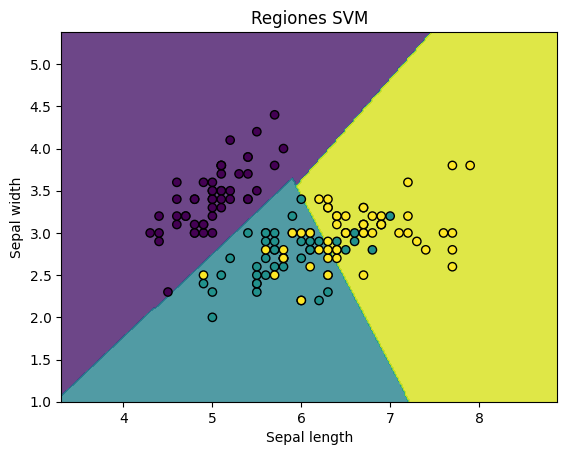

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Carga del conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Solo se consideran las primeras dos características para visualización
y = iris.target

# Crear un clasificador SVM
svm = SVC(kernel='linear')
svm.fit(X, y)

# Obtener límites para el gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Realizar predicciones en la malla de puntos
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar regiones de decisión y muestras
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Regiones SVM')
plt.show()
